In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
X = df.drop("Species", axis=1)

y = df["Species"]

In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


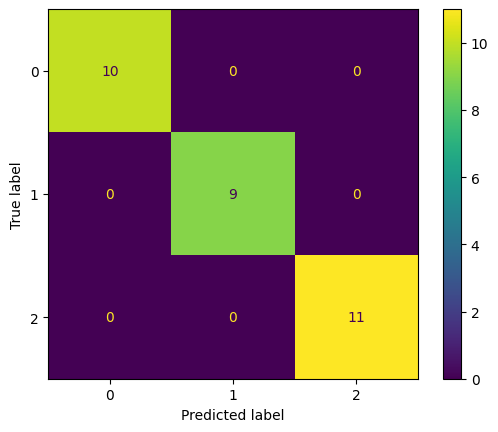

In [14]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

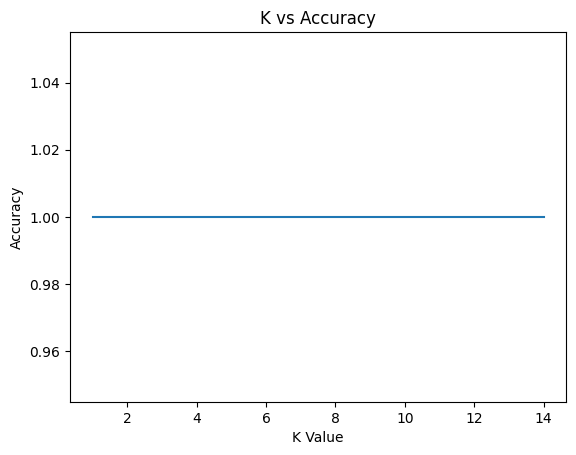

In [15]:
accuracy_scores = []

k_values = range(1,15)

for k in k_values:

    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train,y_train)

    pred = model.predict(X_test)

    accuracy_scores.append(
        accuracy_score(y_test,pred)
    )

plt.plot(k_values, accuracy_scores)

plt.xlabel("K Value")

plt.ylabel("Accuracy")

plt.title("K vs Accuracy")

plt.show()

In [16]:
X2 = X_scaled[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y,
    test_size=0.2,
    random_state=42
)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

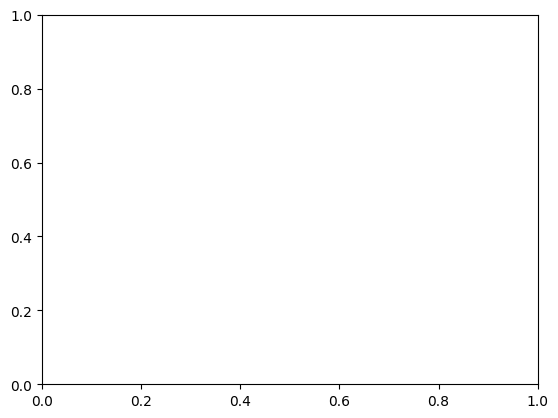

In [17]:
h = .02

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min,x_max,h),
    np.arange(y_min,y_max,h)
)

Z = model.predict(
    np.c_[xx.ravel(), yy.ravel()]
)

Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)

plt.scatter(
    X2[:,0],
    X2[:,1],
    c=pd.factorize(y)[0]
)

plt.title("Decision Boundary")

plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y_encoded,
    test_size=0.2,
    random_state=42
)

In [20]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

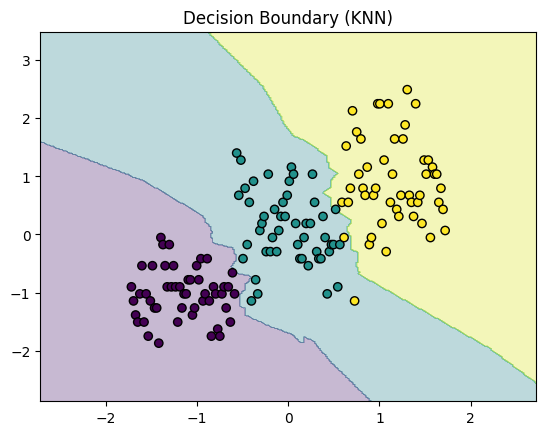

In [21]:
h = .02

x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1

xx, yy = np.meshgrid(
    np.arange(x_min,x_max,h),
    np.arange(y_min,y_max,h)
)

Z = model.predict(
    np.c_[xx.ravel(), yy.ravel()]
)

Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha=0.3)

plt.scatter(
    X2[:,0],
    X2[:,1],
    c=y_encoded,
    edgecolors="k"
)

plt.title("Decision Boundary (KNN)")

plt.show()